In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

# Load the data
data = pd.read_csv('election_table_2.csv')

# Extract the year from the filename
data['year'] = data['filename'].str.extract('(\d{4})_').astype(float)

# Drop DP and RP in the partisan column
data = data[data['partisan'] != 'DP']
data = data[data['partisan'] != 'RP']

# Filter rows based on candidates
filtered_data = data[(data['candidates'] >= 2) & (data['candidates'] <= 10)]

# Drop rows with missing values in the following columns
filtered_data = filtered_data.dropna(subset=['Ashman_D', 'Sarle_coefficient', 'Hartigan_Dip'])

In [2]:
# Define a function to fit models with different reference categories and visualize results
def fit_and_visualize_y(data, reference_cat):
    
    # Create dummy variables with specified reference category
    data_encoded_ref = pd.get_dummies(data, columns=['partisan', 'level', 'type'], drop_first=False)
    data_encoded_ref = data_encoded_ref.drop(columns=[f'partisan_{reference_cat[0]}', f'level_{reference_cat[1]}', f'type_{reference_cat[2]}'], errors='ignore')

    # Create interaction terms
    columns_for_interaction_ref = [col for col in data_encoded_ref.columns if 'type' in col or 'level' in col or 'partisan' in col]

    # Formulas for mixed-effects models
    formula_gamma_mds_ref = ('Q("gamma mds") ~ ' + 
                             ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_gamma_mds_ref)
    formula_bimodality_ref = ('Q("Sarle_coefficient") ~ ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_bimodality_ref)
    formula_ashman_ref = ('Q("Ashman_D") ~ ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_ashman_ref)
    formula_hartigan_ref = ('Q("Hartigan_Dip") ~ ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_hartigan_ref)

    # Fit the mixed-effects models
    md_gamma_mds_ref = smf.mixedlm(formula_gamma_mds_ref, data_encoded_ref, groups=data_encoded_ref['year'], re_formula="~0+Q('candidates')")
    mdf_gamma_mds_ref = md_gamma_mds_ref.fit()
    print(mdf_gamma_mds_ref.summary())
    md_bimodality_ref = smf.mixedlm(formula_bimodality_ref, data_encoded_ref, groups=data_encoded_ref['year'], re_formula="~0+Q('candidates')")
    mdf_bimodality_ref = md_bimodality_ref.fit()
    print(mdf_bimodality_ref.summary())
    md_ashman_ref = smf.mixedlm(formula_ashman_ref, data_encoded_ref, groups=data_encoded_ref['year'], re_formula="~0+Q('candidates')")
    mdf_ashman_ref = md_ashman_ref.fit()
    print(mdf_ashman_ref.summary())
    md_hartigan_ref = smf.mixedlm(formula_hartigan_ref, data_encoded_ref, groups=data_encoded_ref['year'], re_formula="~0+Q('candidates')")
    mdf_hartigan_ref = md_hartigan_ref.fit()
    print(mdf_hartigan_ref.summary())

    # Visualization
    def plot_coefficients(model, title):
        # Create a dataframe with coefficients and p-values
        coefs_df = pd.DataFrame({
            'coef': model.fe_params,
            'p-value': model.pvalues,
            'significant': model.pvalues < 0.05
        })

        # Plot
        plt.figure(figsize=(8, 6))
        coefs_df['coef'].plot(kind='barh')
        plt.title(title)
        plt.xlabel('Coefficient value')
        plt.ylabel('Variable')
        for i in range(len(coefs_df)):
            if coefs_df['significant'][i]:
                plt.gca().get_yticklabels()[i].set_color('red')
        plt.show()

    plot_coefficients(mdf_gamma_mds_ref, title=f'Fixed effects for gamma mds (Reference: {reference_cat})')
    plot_coefficients(mdf_bimodality_ref, title=f'Fixed effects for Sarles (Reference: {reference_cat})')
    plot_coefficients(mdf_ashman_ref, title=f'Fixed effects for Ashman D (Reference: {reference_cat})')
    plot_coefficients(mdf_hartigan_ref, title=f'Fixed effects for Hartigan Dip (Reference: {reference_cat})')

In [3]:
# Define a function to fit models with different reference categories and visualize results
def fit_and_visualize(data, reference_cat):
    
    # Create dummy variables with specified reference category
    data_encoded_ref = pd.get_dummies(data, columns=['partisan', 'level', 'type'], drop_first=False)
    data_encoded_ref = data_encoded_ref.drop(columns=[f'partisan_{reference_cat[0]}', f'level_{reference_cat[1]}', f'type_{reference_cat[2]}'], errors='ignore')

    # Create interaction terms
    columns_for_interaction_ref = [col for col in data_encoded_ref.columns if 'type' in col or 'level' in col or 'partisan' in col]

    # Formulas for mixed-effects models
    formula_gamma_mds_ref = ('Q("gamma mds") ~ Q("candidates") + ' + 
                             ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_gamma_mds_ref)
    formula_bimodality_ref = ('Q("Sarle_coefficient") ~ Q("candidates") + ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_bimodality_ref)
    formula_ashman_ref = ('Q("Ashman_D") ~ Q("candidates") + ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_ashman_ref)
    formula_hartigan_ref = ('Q("Hartigan_Dip") ~ Q("candidates") + ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_hartigan_ref)

    # Fit the mixed-effects models
    md_gamma_mds_ref = smf.mixedlm(formula_gamma_mds_ref, data_encoded_ref, groups=data_encoded_ref['year'])
    mdf_gamma_mds_ref = md_gamma_mds_ref.fit()
    print(mdf_gamma_mds_ref.summary())
    md_bimodality_ref = smf.mixedlm(formula_bimodality_ref, data_encoded_ref, groups=data_encoded_ref['year'])
    mdf_bimodality_ref = md_bimodality_ref.fit()
    print(mdf_bimodality_ref.summary())
    md_ashman_ref = smf.mixedlm(formula_ashman_ref, data_encoded_ref, groups=data_encoded_ref['year'])
    mdf_ashman_ref = md_ashman_ref.fit()
    print(mdf_ashman_ref.summary())
    md_hartigan_ref = smf.mixedlm(formula_hartigan_ref, data_encoded_ref, groups=data_encoded_ref['year'])
    mdf_hartigan_ref = md_hartigan_ref.fit()
    print(mdf_hartigan_ref.summary())

    # Visualization
    def plot_coefficients(model, title):
        # Create a dataframe with coefficients and p-values
        coefs_df = pd.DataFrame({
            'coef': model.fe_params,
            'p-value': model.pvalues,
            'significant': model.pvalues < 0.05
        })

        # Plot
        plt.figure(figsize=(8, 6))
        coefs_df['coef'].plot(kind='barh')
        plt.title(title)
        plt.xlabel('Coefficient value')
        plt.ylabel('Variable')
        for i in range(len(coefs_df)):
            if coefs_df['significant'][i]:
                plt.gca().get_yticklabels()[i].set_color('red')
        plt.show()

    plot_coefficients(mdf_gamma_mds_ref, title=f'Fixed effects for gamma mds (Reference: {reference_cat})')
    plot_coefficients(mdf_bimodality_ref, title=f'Fixed effects for Sarles (Reference: {reference_cat})')
    plot_coefficients(mdf_ashman_ref, title=f'Fixed effects for Ashman D (Reference: {reference_cat})')
    plot_coefficients(mdf_hartigan_ref, title=f'Fixed effects for Hartigan Dip (Reference: {reference_cat})')

In [4]:
# Define a function to fit models with different reference categories and visualize results
def fit_and_visualize_interaction_y(data, reference_cat):
    
    # Create dummy variables with specified reference category
    data_encoded_ref = pd.get_dummies(data, columns=['partisan', 'level', 'type'], drop_first=False)
    data_encoded_ref = data_encoded_ref.drop(columns=[f'partisan_{reference_cat[0]}', f'level_{reference_cat[1]}', f'type_{reference_cat[2]}'], errors='ignore')

    # Create interaction terms
    interaction_terms_ref = []
    columns_for_interaction_ref = [col for col in data_encoded_ref.columns if 'type' in col or 'level' in col or 'partisan' in col]

    # Formulas for mixed-effects models
    formula_gamma_mds_ref = ('Q("gamma mds") ~ ' + 
                             ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]) + 
                             ' + ' + ' + '.join(interaction_terms_ref))
    print(formula_gamma_mds_ref)
    formula_bimodality_ref = ('Q("Sarle_coefficient") ~ ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_bimodality_ref)
    formula_ashman_ref = ('Q("Ashman_D") ~ ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_ashman_ref) 
    formula_hartigan_ref = ('Q("Hartigan_Dip") ~ ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_hartigan_ref) 

    # Fit the mixed-effects models
    md_gamma_mds_ref = smf.mixedlm(formula_gamma_mds_ref, data_encoded_ref, groups=data_encoded_ref['year'], re_formula="~0+Q('candidates')")
    mdf_gamma_mds_ref = md_gamma_mds_ref.fit()
    print(mdf_gamma_mds_ref.summary())
    md_bimodality_ref = smf.mixedlm(formula_bimodality_ref, data_encoded_ref, groups=data_encoded_ref['year'], re_formula="~0+Q('candidates')")
    mdf_bimodality_ref = md_bimodality_ref.fit()
    print(mdf_bimodality_ref.summary())
    md_ashman_ref = smf.mixedlm(formula_ashman_ref, data_encoded_ref, groups=data_encoded_ref['year'], re_formula="~0+Q('candidates')")
    mdf_ashman_ref = md_ashman_ref.fit()
    print(mdf_ashman_ref.summary())
    md_hartigan_ref = smf.mixedlm(formula_hartigan_ref, data_encoded_ref, groups=data_encoded_ref['year'], re_formula="~0+Q('candidates')")
    mdf_hartigan_ref = md_hartigan_ref.fit()
    print(mdf_hartigan_ref.summary())

    # Visualization
    def plot_coefficients(model, title):
        # Create a dataframe with coefficients and p-values
        coefs_df = pd.DataFrame({
            'coef': model.fe_params,
            'p-value': model.pvalues,
            'significant': model.pvalues < 0.05
        })

        # Plot
        plt.figure(figsize=(8, 6))
        coefs_df['coef'].plot(kind='barh')
        plt.title(title)
        plt.xlabel('Coefficient value')
        plt.ylabel('Variable')
        for i in range(len(coefs_df)):
            if coefs_df['significant'][i]:
                plt.gca().get_yticklabels()[i].set_color('red')
        plt.show()

    plot_coefficients(mdf_gamma_mds_ref, title=f'Fixed effects for gamma mds (Reference: {reference_cat})')
    plot_coefficients(mdf_bimodality_ref, title=f'Fixed effects for Sarles (Reference: {reference_cat})')
    plot_coefficients(mdf_ashman_ref, title=f'Fixed effects for Ashman D (Reference: {reference_cat})')
    plot_coefficients(mdf_hartigan_ref, title=f'Fixed effects for Hartigan Dip (Reference: {reference_cat})')

In [5]:
# Define a function to fit models with different reference categories and visualize results
def fit_and_visualize_interaction(data, reference_cat):
    
    # Create dummy variables with specified reference category
    data_encoded_ref = pd.get_dummies(data, columns=['partisan', 'level', 'type'], drop_first=False)
    data_encoded_ref = data_encoded_ref.drop(columns=[f'partisan_{reference_cat[0]}', f'level_{reference_cat[1]}', f'type_{reference_cat[2]}'], errors='ignore')

    # Create interaction terms
    interaction_terms_ref = []
    columns_for_interaction_ref = [col for col in data_encoded_ref.columns if 'type' in col or 'level' in col or 'partisan' in col]
    for col in columns_for_interaction_ref:
        interaction_terms_ref.append(f'Q("candidates"):Q("{col}")')

    # Formulas for mixed-effects models
    formula_gamma_mds_ref = ('Q("gamma mds") ~ Q("candidates") + ' + 
                             ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]) + 
                             ' + ' + ' + '.join(interaction_terms_ref))
    print(formula_gamma_mds_ref)
    formula_bimodality_ref = ('Q("Sarle_coefficient") ~ Q("candidates") + ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]) + 
                              ' + ' + ' + '.join(interaction_terms_ref))
    print(formula_bimodality_ref)
    formula_ashman_ref = ('Q("Ashman_D") ~ Q("candidates") + ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]) + 
                              ' + ' + ' + '.join(interaction_terms_ref))
    print(formula_ashman_ref) 
    formula_hartigan_ref = ('Q("Hartigan_Dip") ~ Q("candidates") + ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]) + 
                              ' + ' + ' + '.join(interaction_terms_ref))
    print(formula_hartigan_ref) 

    # Fit the mixed-effects models
    md_gamma_mds_ref = smf.mixedlm(formula_gamma_mds_ref, data_encoded_ref, groups=data_encoded_ref['year'])
    mdf_gamma_mds_ref = md_gamma_mds_ref.fit()
    print(mdf_gamma_mds_ref.summary())
    md_bimodality_ref = smf.mixedlm(formula_bimodality_ref, data_encoded_ref, groups=data_encoded_ref['year'])
    mdf_bimodality_ref = md_bimodality_ref.fit()
    print(mdf_bimodality_ref.summary())
    md_ashman_ref = smf.mixedlm(formula_ashman_ref, data_encoded_ref, groups=data_encoded_ref['year'])
    mdf_ashman_ref = md_ashman_ref.fit()
    print(mdf_ashman_ref.summary())
    md_hartigan_ref = smf.mixedlm(formula_hartigan_ref, data_encoded_ref, groups=data_encoded_ref['year'])
    mdf_hartigan_ref = md_hartigan_ref.fit()
    print(mdf_hartigan_ref.summary())

    # Visualization
    def plot_coefficients(model, title):
        # Create a dataframe with coefficients and p-values
        coefs_df = pd.DataFrame({
            'coef': model.fe_params,
            'p-value': model.pvalues,
            'significant': model.pvalues < 0.05
        })

        # Plot
        plt.figure(figsize=(8, 6))
        coefs_df['coef'].plot(kind='barh')
        plt.title(title)
        plt.xlabel('Coefficient value')
        plt.ylabel('Variable')
        for i in range(len(coefs_df)):
            if coefs_df['significant'][i]:
                plt.gca().get_yticklabels()[i].set_color('red')
        plt.show()

    plot_coefficients(mdf_gamma_mds_ref, title=f'Fixed effects for gamma mds (Reference: {reference_cat})')
    plot_coefficients(mdf_bimodality_ref, title=f'Fixed effects for Sarles (Reference: {reference_cat})')
    plot_coefficients(mdf_ashman_ref, title=f'Fixed effects for Ashman D (Reference: {reference_cat})')
    plot_coefficients(mdf_hartigan_ref, title=f'Fixed effects for Hartigan Dip (Reference: {reference_cat})')

Q("gamma mds") ~ Q("candidates") + Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S")
Q("Sarle_coefficient") ~ Q("candidates") + Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S")
Q("Ashman_D") ~ Q("candidates") + Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S")
Q("Hartigan_Dip") ~ Q("candidates") + Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S")
                Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    Q("gamma mds")
No. Observations:     253        Method:                REML          
No. Groups:           19         Scale:                 0.0109        
Min. group size:      2          Log-Likelihood:        179.7945      
Max. group size:      49         Converged:             

/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Q("Sarle_coefficient")
No. Observations:  253     Method:             REML                  
No. Groups:        19      Scale:              0.0326                
Min. group size:   2       Log-Likelihood:     55.6242               
Max. group size:   49      Converged:          Yes                   
Mean group size:   13.3                                              
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.826    0.054 15.277 0.000  0.720  0.932
Q("partisan_YES")[T.True]   0.138    0.054  2.559 0.010  0.032  0.243
Q("level_FEDERAL")[T.True]  0.089    0.073  1.217 0.223 -0.054  0.232
Q("level_STATE")[T.True]    0.065    0.051  1.281 0.200 -0.034  0.165
Q("type_B")[T.True]        -0.053   

/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


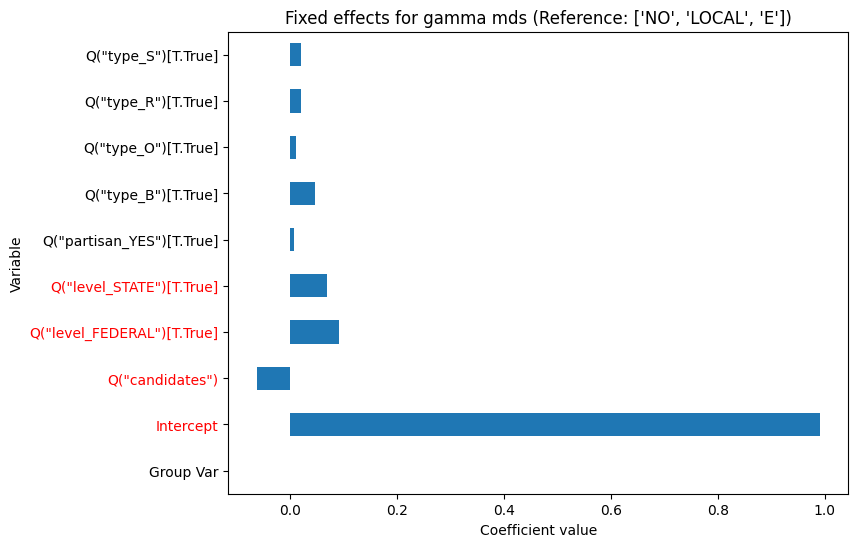

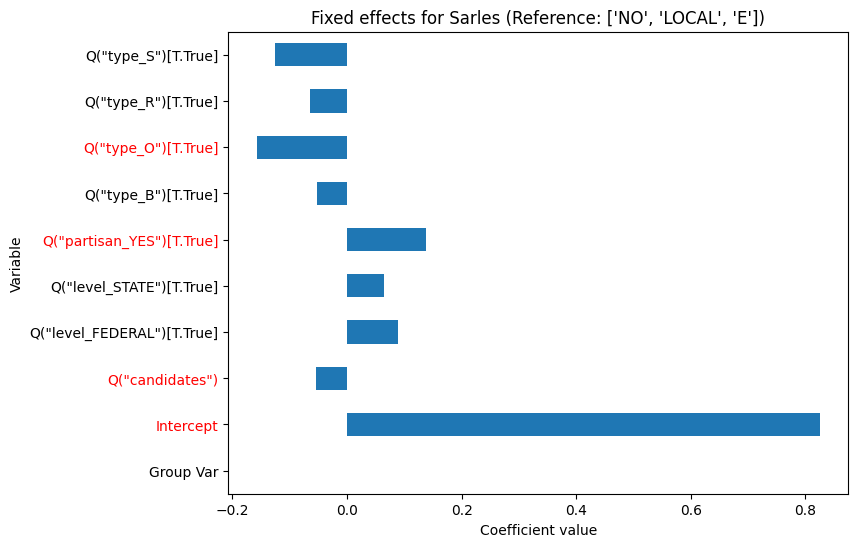

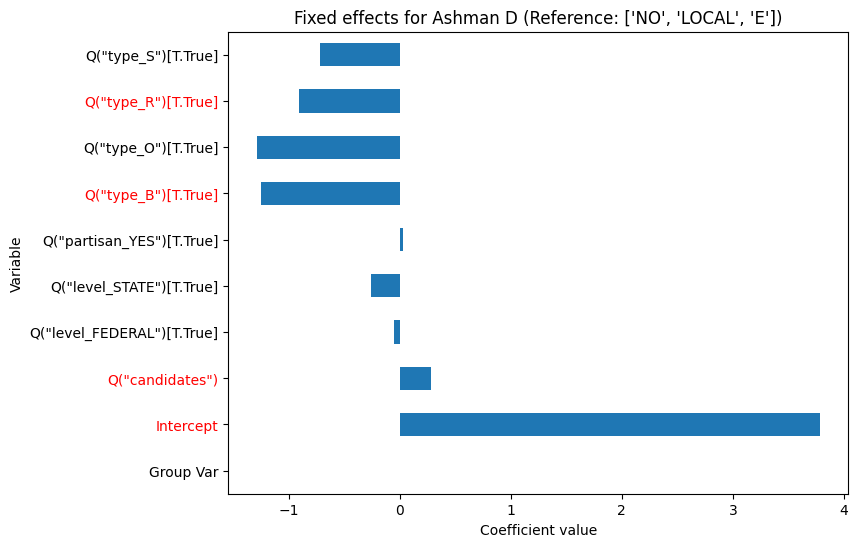

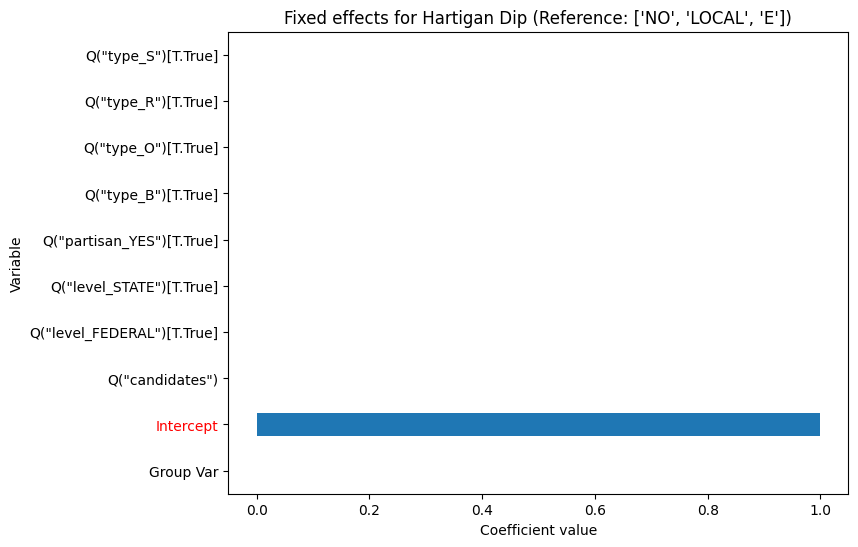

In [6]:
# Fit models and visualize with different reference categories
references = ['NO', 'LOCAL', 'E']
fit_and_visualize(filtered_data, references)

Q("gamma mds") ~ Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S")
Q("Sarle_coefficient") ~ Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S")
Q("Ashman_D") ~ Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S")
Q("Hartigan_Dip") ~ Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S")
                Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    Q("gamma mds")
No. Observations:    253        Method:                REML          
No. Groups:          19         Scale:                 0.0110        
Min. group size:     2          Log-Likelihood:        155.8240      
Max. group size:     49         Converged:             Yes           
Mean group size:     13.3                                     

/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Q("Sarle_coefficient")
No. Observations:  253     Method:             REML                  
No. Groups:        19      Scale:              0.0326                
Min. group size:   2       Log-Likelihood:     40.5116               
Max. group size:   49      Converged:          Yes                   
Mean group size:   13.3                                              
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.673    0.060 11.144 0.000  0.554  0.791
Q("partisan_YES")[T.True]   0.166    0.052  3.176 0.001  0.063  0.268
Q("level_FEDERAL")[T.True]  0.060    0.076  0.800 0.423 -0.088  0.209
Q("level_STATE")[T.True]    0.063    0.055  1.140 0.254 -0.045  0.171
Q("type_B")[T.True]         0.002   

/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2246: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is n

                 Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   Q("Hartigan_Dip")
No. Observations:     253       Method:               REML             
No. Groups:           19        Scale:                0.0000           
Min. group size:      2         Log-Likelihood:       inf              
Max. group size:      49        Converged:            Yes              
Mean group size:      13.3                                             
-----------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                   1.000    0.000 5638.305 0.000  0.999  1.000
Q("partisan_YES")[T.True]   0.000    0.000    1.810 0.070 -0.000  0.001
Q("level_FEDERAL")[T.True]  0.000    0.000    0.736 0.462 -0.000  0.001
Q("level_STATE")[T.True]   -0.000    0.000   -0.227 0.821 -0.000  0.000
Q("type_B

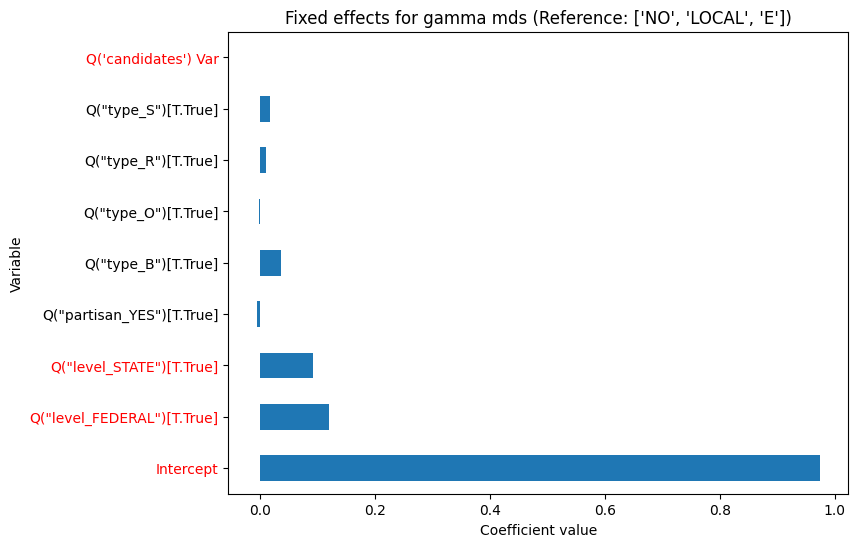

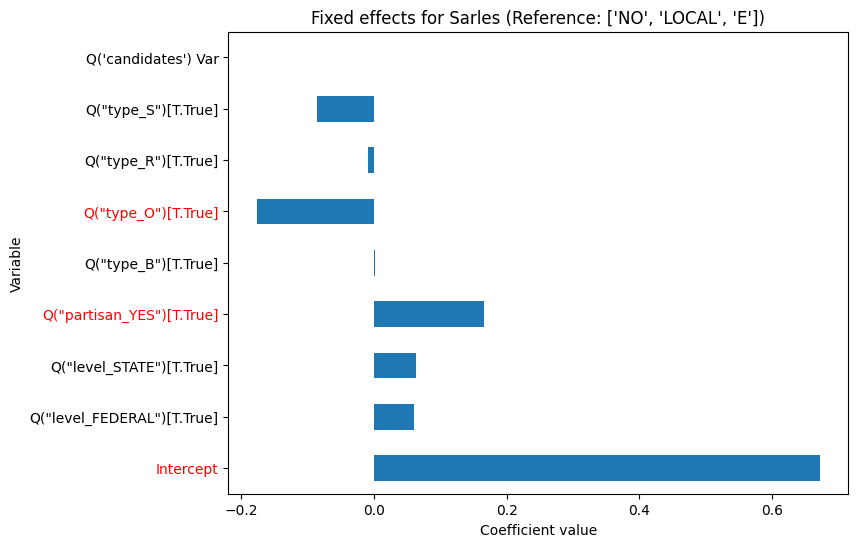

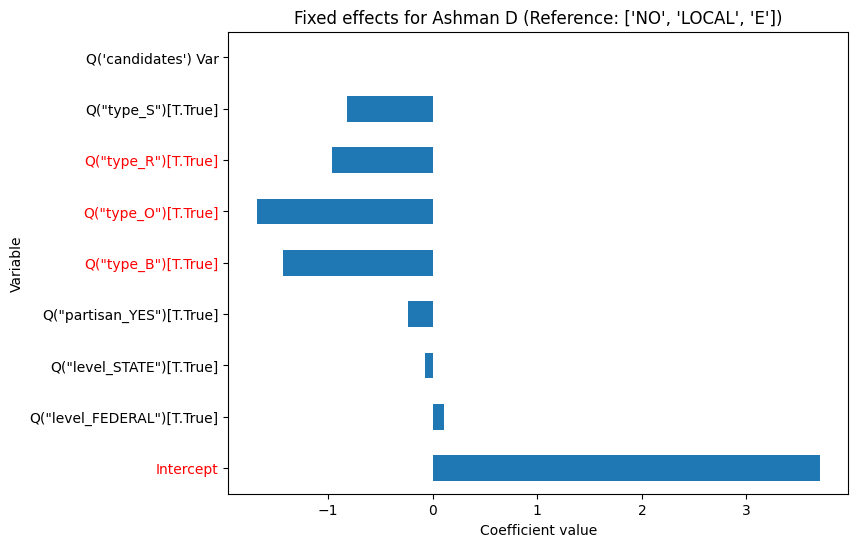

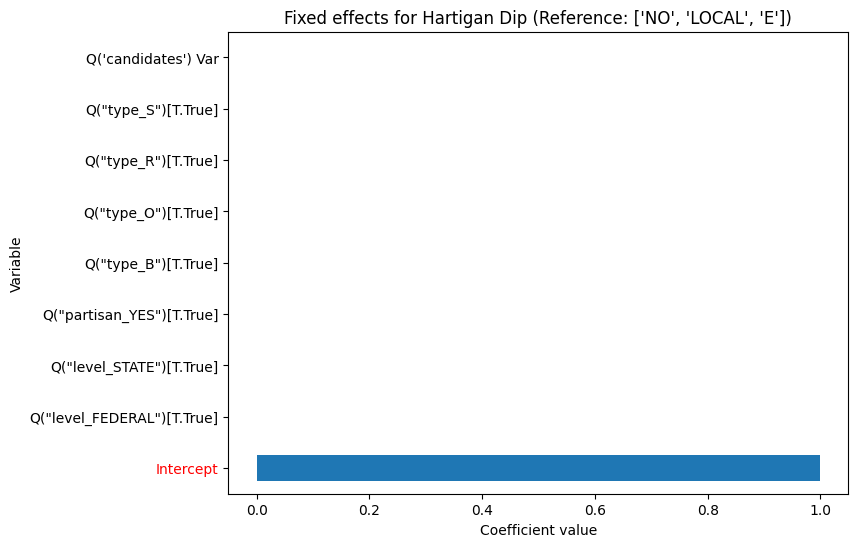

In [7]:
# Fit models and visualize with different reference categories
references = ['NO', 'LOCAL', 'E'] #! re run only with high gamma elections
fit_and_visualize_y(filtered_data, references)

Q("gamma mds") ~ Q("candidates") + Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S") + Q("candidates"):Q("partisan_YES") + Q("candidates"):Q("level_FEDERAL") + Q("candidates"):Q("level_STATE") + Q("candidates"):Q("type_B") + Q("candidates"):Q("type_O") + Q("candidates"):Q("type_R") + Q("candidates"):Q("type_S")
Q("Sarle_coefficient") ~ Q("candidates") + Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S") + Q("candidates"):Q("partisan_YES") + Q("candidates"):Q("level_FEDERAL") + Q("candidates"):Q("level_STATE") + Q("candidates"):Q("type_B") + Q("candidates"):Q("type_O") + Q("candidates"):Q("type_R") + Q("candidates"):Q("type_S")
Q("Ashman_D") ~ Q("candidates") + Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S") + Q("candidates"):Q("partisan_YES") + Q("candidates"):Q("level_FEDERAL") + Q("candidates")

/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2201:

                        Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      Q("Sarle_coefficient")
No. Observations:        253          Method:                  REML                  
No. Groups:              19           Scale:                   0.0325                
Min. group size:         2            Log-Likelihood:          43.4963               
Max. group size:         49           Converged:               No                    
Mean group size:         13.3                                                        
-------------------------------------------------------------------------------------
                                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------
Intercept                                   0.732    0.100  7.300 0.000  0.536  0.929
Q("partisan_YES")[T.True]                   0.422    0.158  2.667 0.008  0.112

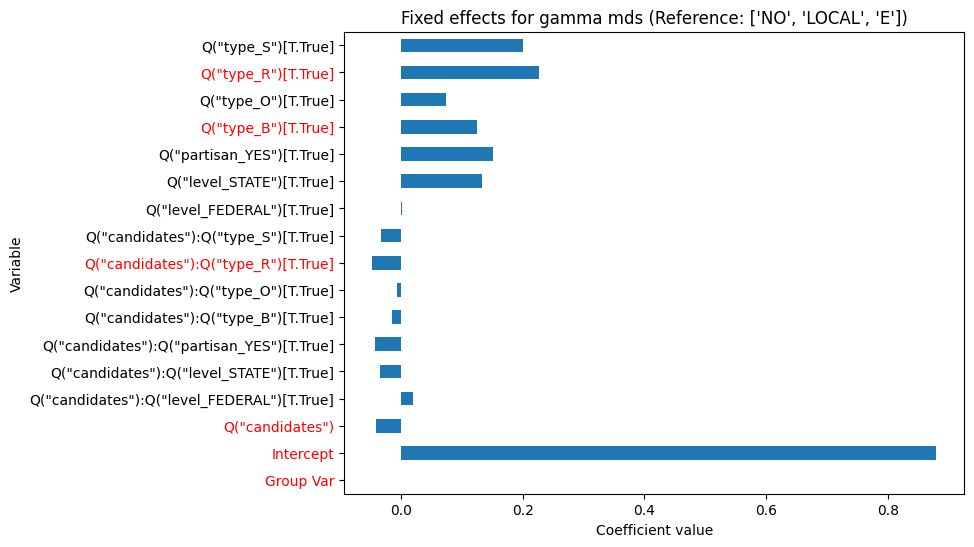

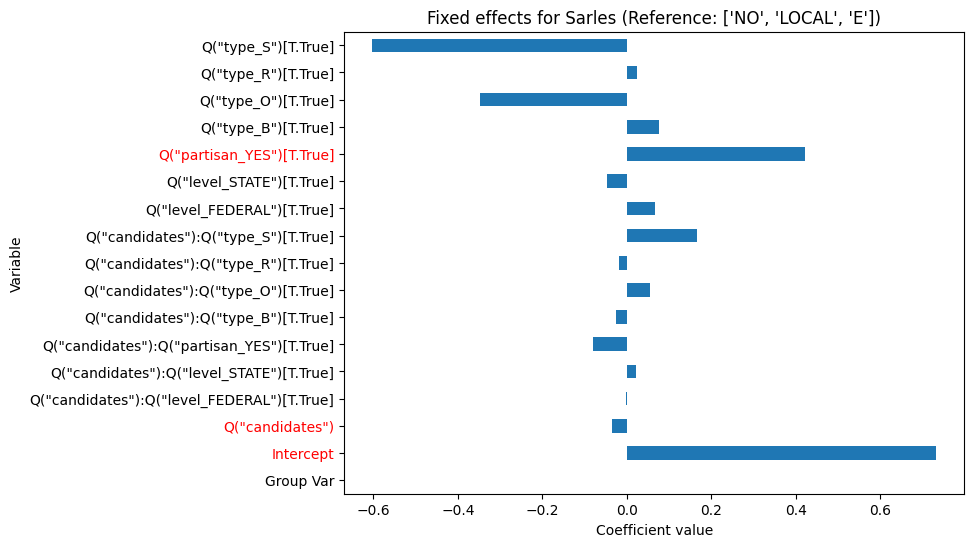

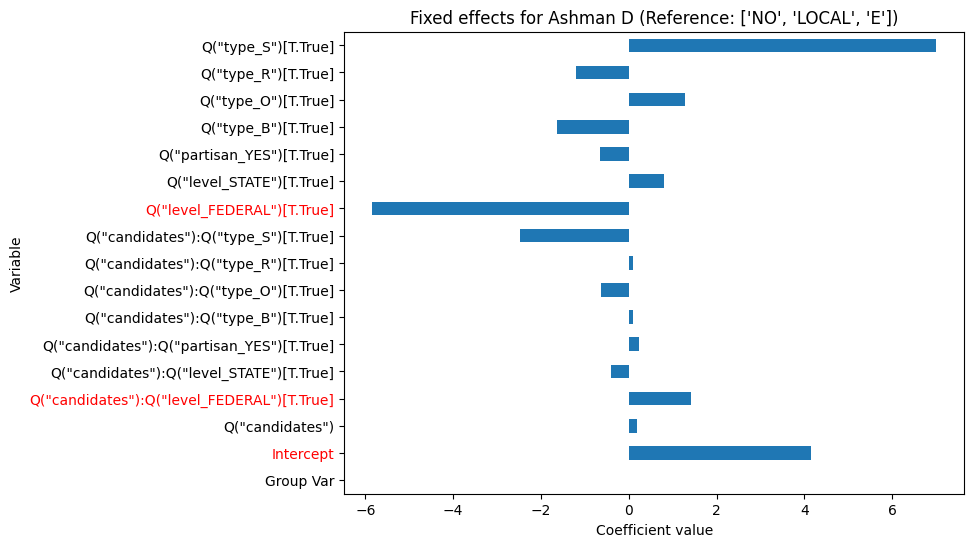

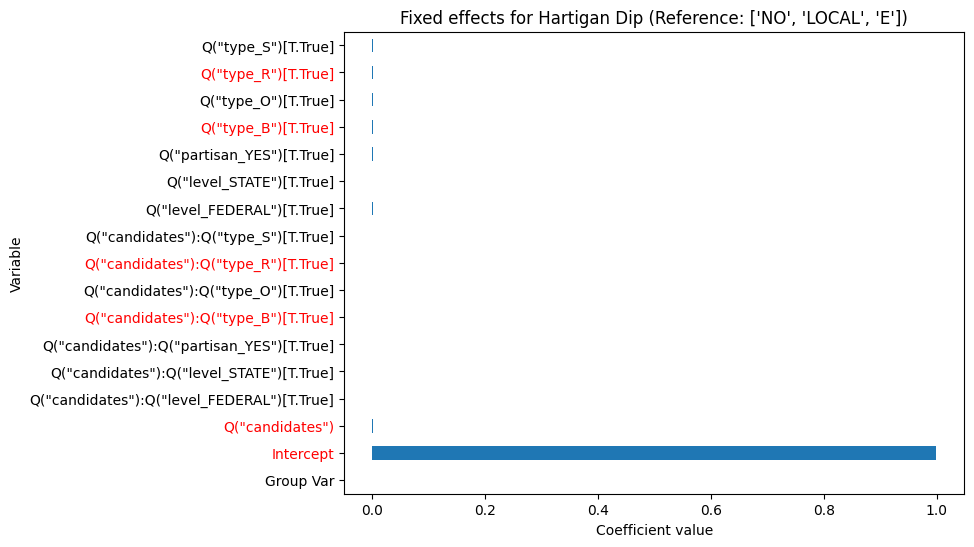

In [8]:
# Fit models and visualize with different reference categories and interaction terms
references = ['NO', 'LOCAL', 'E']
fit_and_visualize_interaction(filtered_data, references)

In [ ]:
# Fit models and visualize with different reference categories and interaction terms
references = ['NO', 'LOCAL', 'E']
fit_and_visualize_interaction_y(filtered_data, references)